<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2003/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

# Mengambil dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Memisahkan fitur (gambar) dan label (angka sebenarnya)
X, y = mnist["data"], mnist["target"]

# Mengubah label dari string menjadi integer
y = y.astype(np.uint8)

# Membagi data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

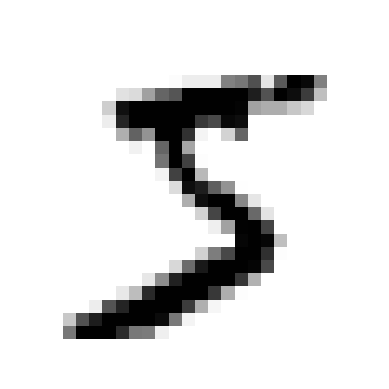

In [6]:
import matplotlib.pyplot as plt
# Mengambil satu contoh data
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

# Menampilkan gambar
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [2]:
from sklearn.linear_model import SGDClassifier

# Membuat label target biner (True untuk 5, False untuk lainnya)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Membuat dan melatih model SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Contoh prediksi
some_digit = X[0] # Mengambil satu gambar angka
sgd_clf.predict([some_digit]) # Memprediksi apakah angka ini 5 atau bukan

array([ True])

In [3]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve

# Mendapatkan prediksi menggunakan cross-validation
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# 1. Menghitung Confusion Matrix
conf_mx = confusion_matrix(y_train_5, y_train_pred)
# conf_mx akan berisi: [[TN, FP], [FN, TP]]

# 2. Menghitung Precision dan Recall
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

# 3. Mendapatkan data untuk Kurva ROC
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

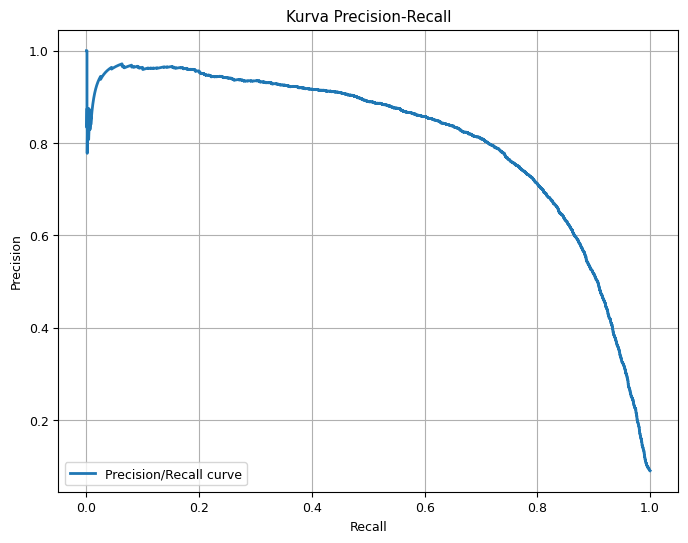

In [13]:
from sklearn.metrics import precision_recall_curve
# Menghitung precision dan recall untuk berbagai threshold
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Membuat plot
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.legend(loc="lower left")
plt.title("Kurva Precision-Recall")
plt.show()

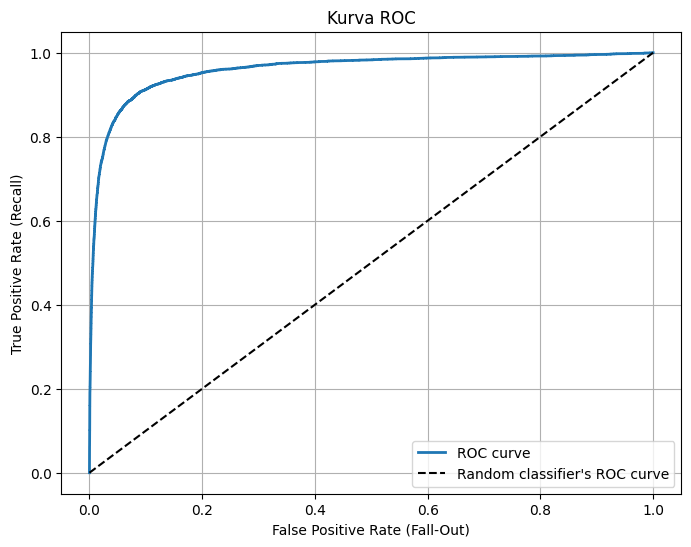

In [9]:
# Membuat plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier's ROC curve") # Garis putus-putus
plt.xlabel("False Positive Rate (Fall-Out)")
plt.ylabel("True Positive Rate (Recall)")
plt.grid(True)
plt.legend(loc="lower right")
plt.title("Kurva ROC")
plt.show()

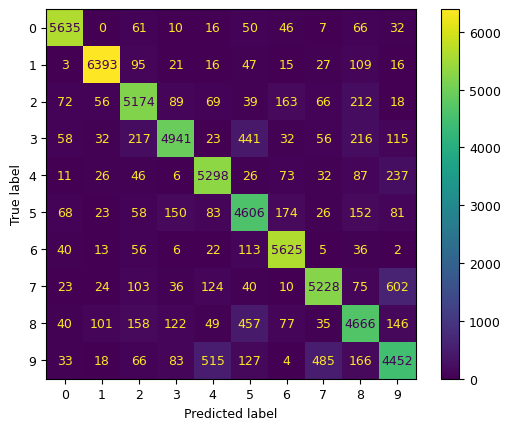

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
# Mendapatkan prediksi untuk semua kelas
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

# Menampilkan confusion matrix
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

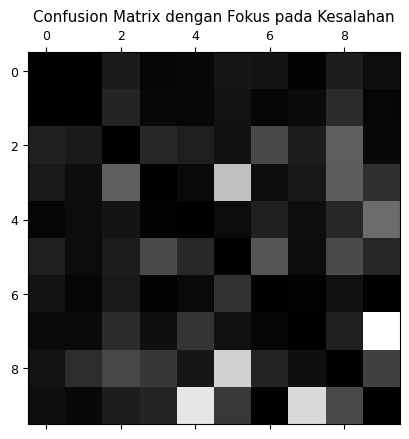

In [11]:
from sklearn.metrics import confusion_matrix
# Menghitung confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Normalisasi berdasarkan jumlah gambar di setiap kelas
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

# Mengisi diagonal dengan 0 untuk fokus pada kesalahan
np.fill_diagonal(norm_cm, 0)

# Menampilkan matriks yang sudah dimodifikasi
plt.matshow(norm_cm, cmap=plt.cm.gray)
plt.title("Confusion Matrix dengan Fokus pada Kesalahan")
plt.show()

In [4]:
from sklearn.svm import SVC

# Melatih model SVM untuk klasifikasi multikelas
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train berisi label asli (0-9)
svm_clf.predict([some_digit]) # Akan memprediksi angka sebenarnya

array([5], dtype=uint8)